In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

In [3]:
customer_churn = pd.read_csv('Customer_Churn.csv')

In [4]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## A) Data Manipulation

In [5]:
customer_5 = customer_churn.iloc[:,4]

In [6]:
customer_15 = customer_churn.iloc[:,14]

In [7]:
senior_male_electronic = customer_churn[(customer_churn['SeniorCitizen'] == 1) &
                                        (customer_churn['gender'] == 'Male') &
                                        (customer_churn['PaymentMethod'] == 'Electronic check')]

In [8]:
customer_total_tenure = customer_churn[(customer_churn['tenure'] > 70) |
                                       (customer_churn['MonthlyCharges'] > 100)]

In [9]:
two_mail_yes = customer_churn[(customer_churn['Contract'] == 'Two year') &
                              (customer_churn['PaymentMethod'] == 'Mailed check') &
                              (customer_churn['Churn'] == 'Yes')]

In [10]:
customer_333 = customer_churn.sample(n=333, random_state=42)

In [11]:
churn_counts = customer_churn['Churn'].value_counts()

## B) Data Visualization

In [12]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable


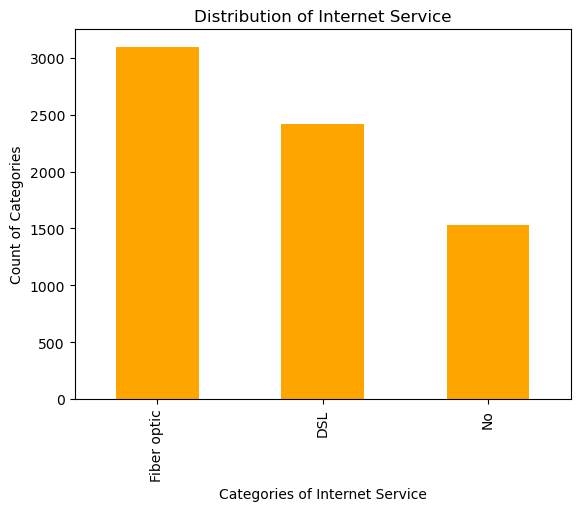

In [13]:
import matplotlib.pyplot as plt

customer_churn['InternetService'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

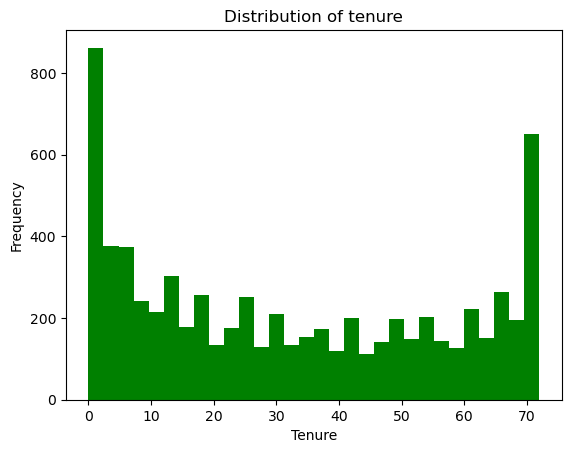

In [21]:
customer_churn['tenure'].plot(kind='hist', bins=30, color='green', title='Distribution of tenure')
plt.xlabel('Tenure')
plt.show()

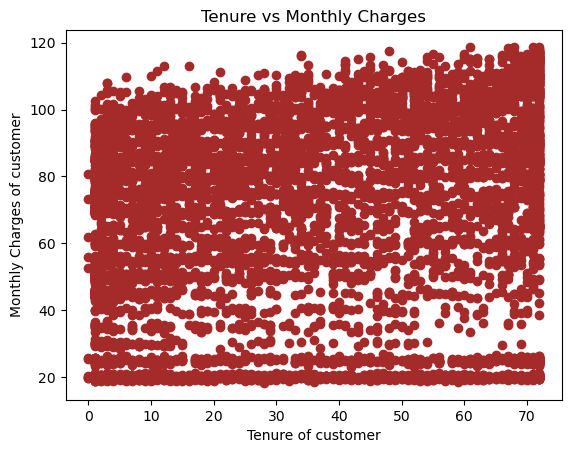

In [22]:
plt.scatter(customer_churn['tenure'], customer_churn['MonthlyCharges'], color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

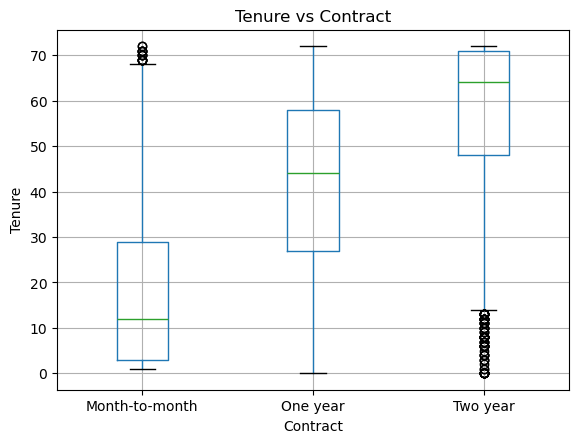

In [26]:
customer_churn.boxplot(column='tenure', by='Contract')
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure vs Contract')
plt.suptitle('')
plt.show()

## C) Linear Regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = customer_churn[['tenure']]
y = customer_churn['MonthlyCharges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
error = y_test - y_pred

print("Root Mean Square Error:", rmse)
print("Error:\n", error)

Root Mean Square Error: 29.07936015646814
Error:
 185    -30.306590
2715   -42.185209
3825   -51.475579
1807    21.243410
132    -24.898812
          ...    
5522    15.043410
6377   -10.456590
5500   -12.791303
2392    29.737316
6705   -10.479115
Name: MonthlyCharges, Length: 2113, dtype: float64


## D) Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

X = customer_churn[['MonthlyCharges']]
y = customer_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[1797    0]
 [ 669    0]]
Accuracy: 0.7287104622871047


In [40]:
X = customer_churn[['tenure', 'MonthlyCharges']]
y = customer_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion matrix\n", cm)
print("Accuracy:", accuracy)

Confusion matrix
 [[944  92]
 [193 180]]
Accuracy: 0.7977288857345636


## E) Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

X = customer_churn[['tenure']]
y = customer_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Acccuracy:", accuracy)

Confusion Matrix:
 [[951  85]
 [257 116]]
Acccuracy: 0.7572746628814763


## F) Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

X = customer_churn[['tenure', 'MonthlyCharges']]
y = customer_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[1331  208]
 [ 312  262]]
Accuracy: 0.7539044013251301
